In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from xml.dom import minidom
import cv2
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from skimage import io

In [3]:
obj = minidom.parse('gdrive/MyDrive/facetest/1_0_1_20170117130048013.xml')
width = obj.getElementsByTagName('width')
int(width[0].firstChild.nodeValue)

246

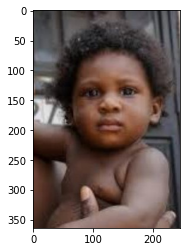

In [4]:
img = cv2.imread('gdrive/MyDrive/facetest/1_0_1_20170117130048013.jpg',cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
def get_value(obj,name) :
    a = int(obj.getElementsByTagName(name)[0].firstChild.nodeValue)
    return a

In [6]:
xmin = get_value(obj,'xmin')
ymin = get_value(obj,'ymin')
xmax = get_value(obj,'xmax')
ymax = get_value(obj,'ymax')
width = get_value(obj,'width')
height = get_value(obj,'height')

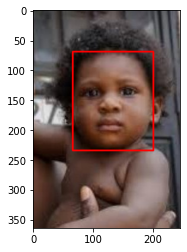

In [7]:
bnd_img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0),2)
plt.imshow(bnd_img)

In [8]:
def load_img(path) :
    X = []
    for i in sorted(glob.glob(path)) :
        img = cv2.imread(i,cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(225,225))
        X.append(img)
    return np.asarray(X)

In [9]:
def load_xml(path) :
    y = []
    for i in sorted(glob.glob(path)) :
        
        obj = minidom.parse(i)
        folder = obj.getElementsByTagName('folder')[0].firstChild.nodeValue
        width = get_value(obj,'width')
        height = get_value(obj,'height')
        xmin = get_value(obj,'xmin')/width
        ymin = get_value(obj,'ymin')/height
        xmax = get_value(obj,'xmax')/width
        ymax = get_value(obj,'ymax')/height

            
        y.append([xmin,ymin,xmax,ymax])
    return np.asarray(y)

In [10]:
X = load_img('gdrive/MyDrive/facetest/*.jpg')
X.shape

(304, 225, 225, 3)

In [11]:
Y = load_xml('gdrive/MyDrive/facetest/*.xml')
Y.shape


(304, 4)

In [12]:
X.shape

(304, 225, 225, 3)

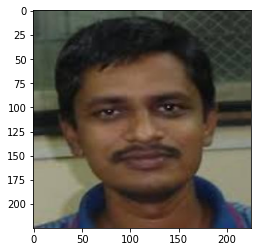

In [13]:
plt.imshow(X[206])
#Y[0]

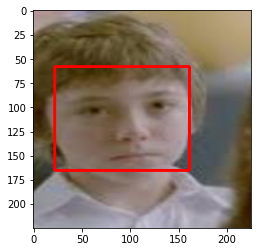

In [14]:
xmin = int(Y[0][0]*225)
ymin = int(Y[0][1]*225)
xmax = int(Y[0][2]*225)
ymax = int(Y[0][3]*225)
width = get_value(obj,'width')
height = get_value(obj,'height')
bnd_img = cv2.rectangle(X[0],(xmin,ymin),(xmax,ymax),(255,0,0),2)
plt.imshow(bnd_img)

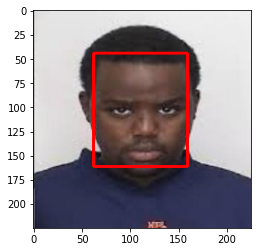

In [15]:
xmin = int(Y[15][0]*225)
ymin = int(Y[15][1]*225)
xmax = int(Y[15][2]*225)
ymax = int(Y[15][3]*225)
width = get_value(obj,'width')
height = get_value(obj,'height')
bnd_img = cv2.rectangle(X[15],(xmin,ymin),(xmax,ymax),(255,0,0),2)
plt.imshow(bnd_img)

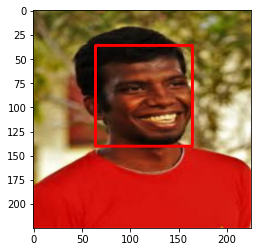

In [16]:
xmin = int(Y[205][0]*225)
ymin = int(Y[205][1]*225)
xmax = int(Y[205][2]*225)
ymax = int(Y[205][3]*225)
width = get_value(obj,'width')
height = get_value(obj,'height')
bnd_img = cv2.rectangle(X[205],(xmin,ymin),(xmax,ymax),(255,0,0),2)
plt.imshow(bnd_img)

In [191]:
import numpy as np
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(225,225,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Conv2D(512,(1,1),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Conv2D(512,(1,1),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(512,(1,1),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
#model.add(Dense(512,activation='relu'))
model.add(Dense(252,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

#model.compile(loss='mse',optimizer=keras.optimizers.Adam(),metrics=['mae'])
model.add(Dense(4))
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 225, 225, 32)      896       
                                                                 
 conv2d_109 (Conv2D)         (None, 225, 225, 32)      9248      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_39 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_110 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 conv2d_111 (Conv2D)         (None, 112, 112, 64)    

In [192]:
model.compile(optimizer='adam',loss='huber')

In [193]:
model.fit(X,Y,epochs=200)

Epoch 1/200
10/10 [==============================] - 3s 158ms/step - loss: 0.8579
Epoch 2/200
10/10 [==============================] - 2s 157ms/step - loss: 0.2464
Epoch 3/200
10/10 [==============================] - 2s 157ms/step - loss: 0.0840
Epoch 4/200
10/10 [==============================] - 2s 157ms/step - loss: 0.0676
Epoch 5/200
10/10 [==============================] - 2s 157ms/step - loss: 0.0377
Epoch 6/200
10/10 [==============================] - 2s 157ms/step - loss: 0.0189
Epoch 7/200
10/10 [==============================] - 2s 159ms/step - loss: 0.0122
Epoch 8/200
10/10 [==============================] - 2s 158ms/step - loss: 0.0093
Epoch 9/200
10/10 [==============================] - 2s 159ms/step - loss: 0.0077
Epoch 10/200
10/10 [==============================] - 2s 159ms/step - loss: 0.0062
Epoch 11/200
10/10 [==============================] - 2s 160ms/step - loss: 0.0060
Epoch 12/200
10/10 [==============================] - 2s 160ms/step - loss: 0.0058
Epoch 13/200


In [211]:
model.save('face6.h5')

In [102]:
pred_img = cv2.imread('face.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(255,255))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))

AttributeError: ignored

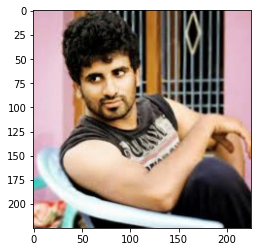

In [23]:
plt.imshow(pred_img)

In [ ]:
bnd

array([[0.33892903, 0.1330788 , 0.68519044, 0.52828383]], dtype=float32)

In [ ]:
bnd[0][1]*225,

(4912.098455429077,)

In [62]:
img = cv2.rectangle(pred_img,(int(bnd[0][0]*255),int(bnd[0][1]*255)),(int(bnd[0][2]*255),int(bnd[0][3]*255)),(255,0,0),8)

In [26]:
img = cv2.rectangle(pred_img,(int(Y[1][0]*225),int(Y[1][1]*225)),(int(Y[1][2]*225),int(Y[1][3]*225)),(255,0,0),8)

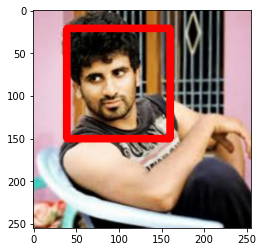

In [63]:
plt.imshow(img)

In [68]:
pred_img = cv2.imread('face1.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(255,255))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))

In [69]:
img = cv2.rectangle(pred_img,(int(bnd[0][0]*255),int(bnd[0][1]*255)),(int(bnd[0][2]*255),int(bnd[0][3]*255)),(255,0,0),8)

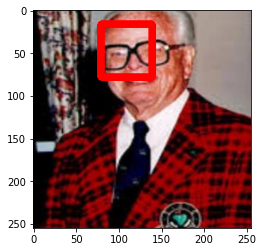

In [70]:
plt.imshow(img)

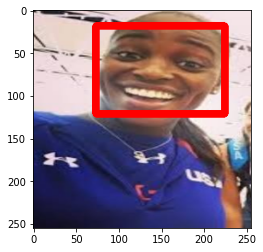

In [71]:
pred_img = cv2.imread('face2.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(255,255))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*255),int(bnd[0][1]*255)),(int(bnd[0][2]*255),int(bnd[0][3]*255)),(255,0,0),8)
plt.imshow(img)

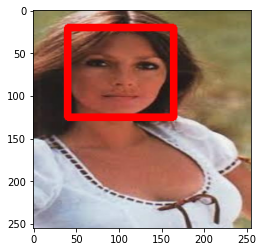

In [72]:
pred_img = cv2.imread('face5.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(255,255))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*255),int(bnd[0][1]*255)),(int(bnd[0][2]*255),int(bnd[0][3]*255)),(255,0,0),8)
plt.imshow(img)

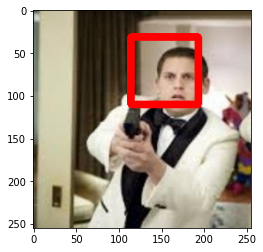

In [73]:
pred_img = cv2.imread('face3.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(255,255))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*255),int(bnd[0][1]*255)),(int(bnd[0][2]*255),int(bnd[0][3]*255)),(255,0,0),8)
plt.imshow(img)

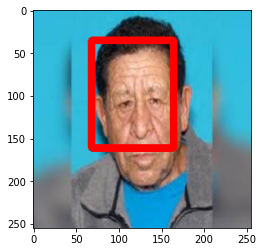

In [75]:
pred_img = cv2.imread('face4.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(255,255))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*255),int(bnd[0][1]*255)),(int(bnd[0][2]*255),int(bnd[0][3]*255)),(255,0,0),8)
plt.imshow(img)

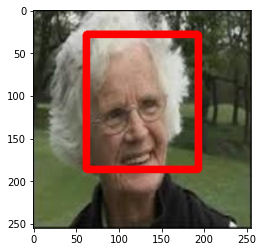

In [77]:
pred_img = cv2.imread('face6.jpg')

pred_img = cv2.resize(pred_img,(255,255))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*255),int(bnd[0][1]*255)),(int(bnd[0][2]*255),int(bnd[0][3]*255)),(255,0,0),8)
plt.imshow(img)

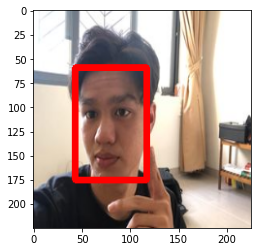

In [194]:
pred_img = cv2.imread('ming.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),5)
plt.imshow(img)

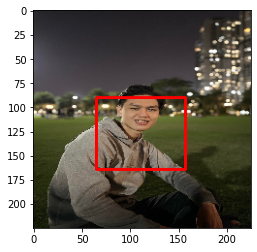

In [195]:
pred_img = cv2.imread('ming4.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),2)
plt.imshow(img)

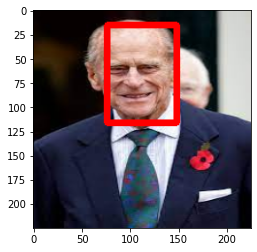

In [196]:
pred_img = cv2.imread('prince1.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),5)
plt.imshow(img)

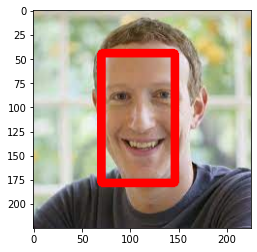

In [197]:
pred_img = cv2.imread('mark.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

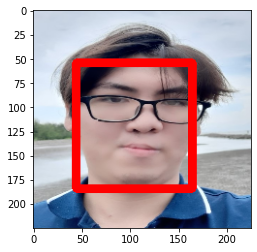

In [198]:
pred_img = cv2.imread('thanh2.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

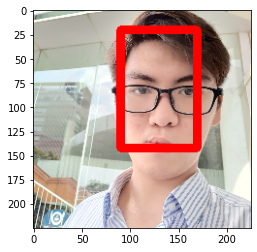

In [199]:
pred_img = cv2.imread('thanh.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

In [200]:
pred_img = cv2.imread('huycla.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

AttributeError: ignored

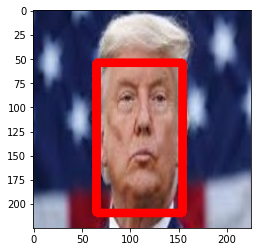

In [201]:
pred_img = cv2.imread('trump.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*250),int(bnd[0][1]*255)),(int(bnd[0][2]*220),int(bnd[0][3]*255)),(255,0,0),8)
plt.imshow(img)

In [163]:
pred_img = cv2.imread('kissingger.jfif')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

AttributeError: ignored

(183, 275, 3)


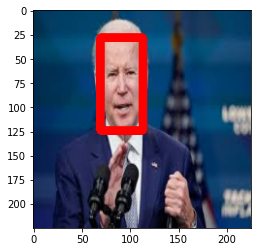

In [202]:
pred_img = cv2.imread('joe3.jpg')
print(pred_img.shape)
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

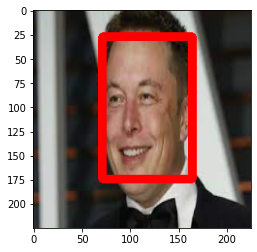

In [203]:
pred_img = cv2.imread('musk.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

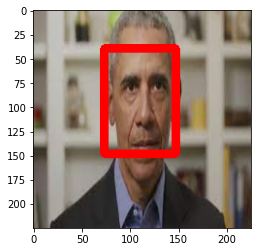

In [204]:
pred_img = cv2.imread('obama.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

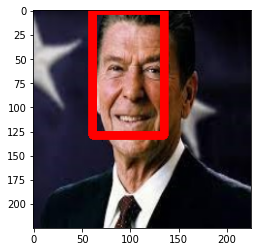

In [205]:
pred_img = cv2.imread('reagan.jfif')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

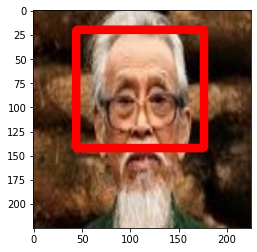

In [206]:
pred_img = cv2.imread('old.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

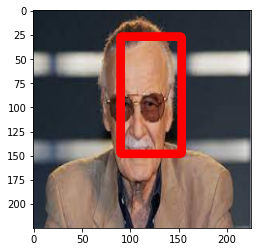

In [207]:
pred_img = cv2.imread('stan.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

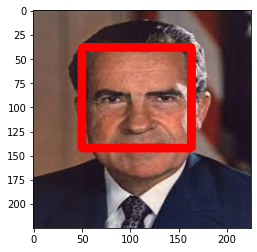

In [170]:
pred_img = cv2.imread('nixon.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

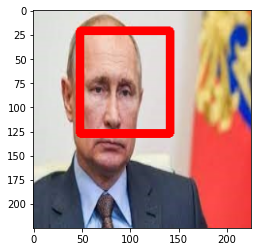

In [171]:
pred_img = cv2.imread('pu.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

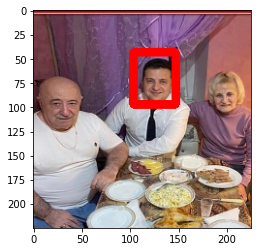

In [ ]:
pred_img = cv2.imread('ze.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

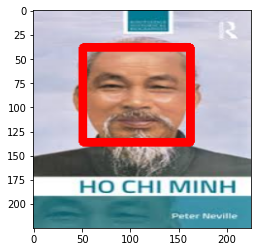

In [ ]:
pred_img = cv2.imread('hcm2.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

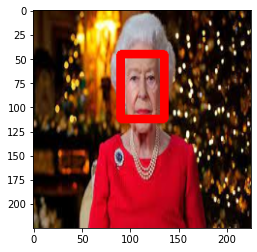

In [208]:
pred_img = cv2.imread('queen2.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

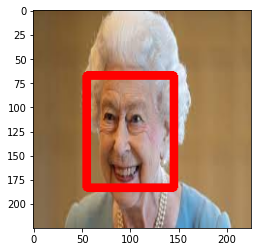

In [ ]:
pred_img = cv2.imread('queen.jfif')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

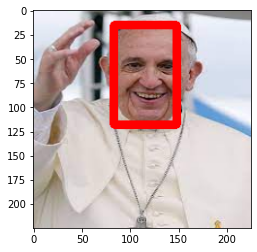

In [209]:
pred_img = cv2.imread('pope.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

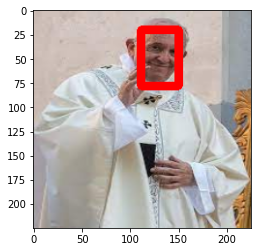

In [210]:
pred_img = cv2.imread('pope1.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

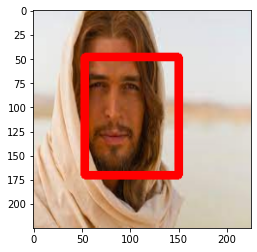

In [ ]:
pred_img = cv2.imread('jesus1.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

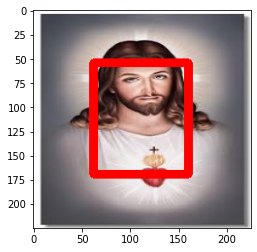

In [ ]:
pred_img = cv2.imread('jesus2.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

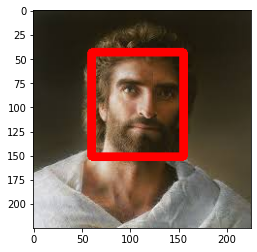

In [ ]:
pred_img = cv2.imread('jesus3.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

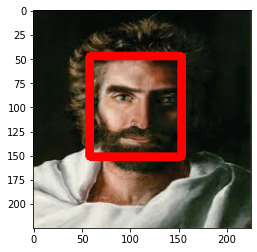

In [ ]:
pred_img = cv2.imread('jesus.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

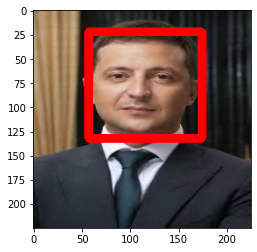

In [ ]:
pred_img = cv2.imread('ze1.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

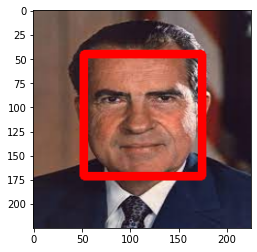

In [ ]:
pred_img = cv2.imread('nixon.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

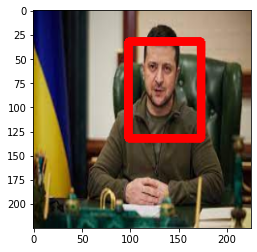

In [ ]:
pred_img = cv2.imread('ze.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

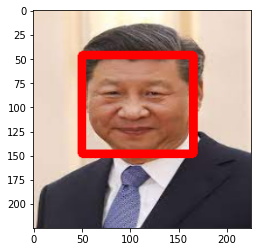

In [ ]:
pred_img = cv2.imread('xi.jpg')
pred_img.shape
pred_img = cv2.resize(pred_img,(225,225))
pred_img = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)
#pred_img = pred_img.astype('float')
#pred_img /=255
bnd = model.predict(np.array([pred_img]))
img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)
plt.imshow(img)

In [ ]:
def predict(img_path,model,url=False) :
    if url :
        pred_img = io.imread(img_path)
    else :
        pred_img = cv2.imread(img_path)
    pred_img = cv2.resize(pred_img,(225,225))
    bnd = model.predict(np.asarray([pred_img]))
    #bnd = np.round(bnd)
    #bnd = bnd.astype('int64')
    img = cv2.rectangle(pred_img,(int(bnd[0][0]*225),int(bnd[0][1]*225)),(int(bnd[0][2]*225),int(bnd[0][3]*225)),(255,0,0),8)


    plt.imshow(img)